In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import os

# pegar o caminho completo do arquivo da base de dados
diretorio_atual = os.getcwd()
caminho_dataset = os.path.join(diretorio_atual, 'datasets', 'parkinsons.data')

# carregar a base de dados e colocar na variável df
df = pd.read_csv(caminho_dataset)

# colocar as outras colunas para prever o y
X = df.drop(['status', 'name', 'APQ', 'D2',
            'Fhi(Hz)', 'Flo(Hz)', 'Fo(Hz)',
             'PPQ', 'RAP', 'spread1', 'spread2'], axis=1)

# colocar a coluna a ser prevista em y
y = df['status']


# dividir as informações de x e y em treino e teste em uma proporção de (0.75) e (0.25)
#TODO: testar stratify:y
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2)

# criar uma pipeline de processos
pipe = Pipeline(steps=[('StandardScaler', StandardScaler()),
                       ('MinMaxScaler', MinMaxScaler()),
                       ('GradientBoostingClassifier', GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=3))])# learning_rate=0.1, n_estimators=50

pipe.fit(X_treino, y_treino)


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('MinMaxScaler', MinMaxScaler()),
                ('GradientBoostingClassifier',
                 GradientBoostingClassifier(n_estimators=50))])

In [11]:
from sklearn.model_selection import cross_val_score

-1 * cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error')

array([0.25641026, 0.20512821, 0.12820513, 0.28205128, 0.28205128])

In [343]:
import numpy as np
from sklearn.metrics import mean_squared_error

# fazer uma previsão do modelo a fins de teste
previsao_modelo_principal = pipe.predict(X_teste)

# testar a previsão do modelo
np.sqrt(mean_squared_error(y_teste, previsao_modelo_principal))

0.4236592728681617

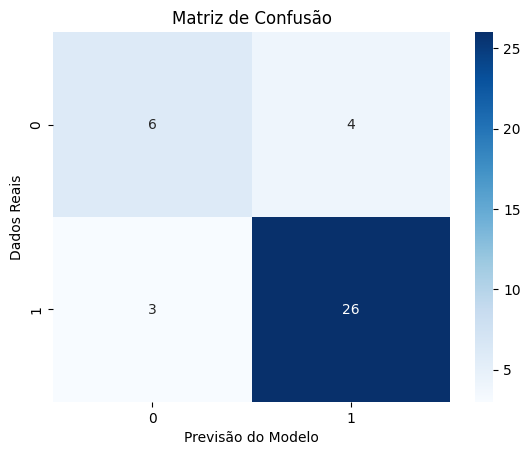

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# criar uma matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsao_modelo_principal)

# plotar um gráfico com os (TP, FP, TN, FN)
sns.heatmap(matriz_confusao, annot=True, fmt='d',
            cmap='Blues')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Dados Reais')
plt.title('Matriz de Confusão')
plt.show()



In [345]:
'''
# mostra o caminho do arquivo
caminho_dataset_atualizado = os.path.join(
    os.getcwd(), 'datasets', 'parkinsons_updrs.data')

# carregar a nova base de dados
novos_dados = pd.read_csv(caminho_dataset_atualizado)

# criar um df com informações úteis no final mas inúteis para a IA
previsao_final = novos_dados[['subject#', 'age', 'sex', 'test_time']]

# tirar as informações não foram treinadas
novos_dados = novos_dados.drop(
    ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter:PPQ5',
     'Jitter:RAP', 'Shimmer:APQ11'], axis=1)

# calcular as probabilidades da pessoa ter parkinson pegando somente a classe 1 (ter parkinson)
probabilidade_novos_dados = (pipe.predict_proba(novos_dados)[
    :, 1]*100).round(2)

# criando uma coluna de probabilidades de ter parkinson
previsao_final['probabilidade'] = probabilidade_novos_dados

# salvar o novo df
previsao_final.to_csv('parkinsons_predict.csv', index=False)
'''

"\n# mostra o caminho do arquivo\ncaminho_dataset_atualizado = os.path.join(\n    os.getcwd(), 'datasets', 'parkinsons_updrs.data')\n\n# carregar a nova base de dados\nnovos_dados = pd.read_csv(caminho_dataset_atualizado)\n\n# criar um df com informações úteis no final mas inúteis para a IA\nprevisao_final = novos_dados[['subject#', 'age', 'sex', 'test_time']]\n\n# tirar as informações não foram treinadas\nnovos_dados = novos_dados.drop(\n    ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter:PPQ5',\n     'Jitter:RAP', 'Shimmer:APQ11'], axis=1)\n\n# calcular as probabilidades da pessoa ter parkinson pegando somente a classe 1 (ter parkinson)\nprobabilidade_novos_dados = (pipe.predict_proba(novos_dados)[\n    :, 1]*100).round(2)\n\n# criando uma coluna de probabilidades de ter parkinson\nprevisao_final['probabilidade'] = probabilidade_novos_dados\n\n# salvar o novo df\nprevisao_final.to_csv('parkinsons_predict.csv', index=False)\n"